
<h1 id="Ridge-Regression">Ridge Regression<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#Ridge-Regression">Â¶</a></h1>



<p>In this lesson, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization.</p>
<p>Learning objectives:</p>
<ul>
<li>Using a pre-built implementation of regression to run polynomial regression;</li>
<li>Using matplotlib to visualize polynomial regressions;</li>
<li>Using a pre-built implementation of regression to run polynomial regression, this time with L2 penalty;</li>
<li>Using matplotlib to visualize polynomial regressions under L2 regularization;</li>
<li>Choosing best L2 penalty using cross-validation;</li>
<li>Assessing the final fit using test data.</li>
</ul>
<p>In addition, we will implement our own ridge regression learning algorithm using gradient descent.</p>



<p>We will continue to use the House data from previous notebooks.</p>


In [1]:

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt



In [2]:

### Importing data:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('kc_house_data.csv', dtype= dtype_dict)
sales = pd.DataFrame(sales)
sales.sort_values(['sqft_living', 'price'], inplace = True)
sales.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0



<h3 id="1.-Polynomial-Regression---Revisited">1. Polynomial Regression - Revisited<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#1.-Polynomial-Regression---Revisited">Â¶</a></h3>



<p>Polynominal_dataframe Function: This function creates an data frame consisting of the powers of an array up to a specific degree.</p>


In [3]:

def polynominal_dataframe(feature, degree, dataset):
    poly_dataframe = dataset[['id','price', feature]]
    poly_dataframe.rename(columns = {feature: 'power_1'}, inplace =True)
    if degree > 1:
        for i in range(2,degree+1):
            name = 'power_'+str(i)
            poly_dataframe[name] = np.power(poly_dataframe.power_1, i)
    return poly_dataframe



In [4]:
poly1_data = polynominal_dataframe('sqft_living',15,sales)
target = sales['price']
poly1_data=poly1_data.drop(['price','id'],axis=1)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly1_data,target)
model.coef_

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


array([ 4.56404164e-91,  6.91713456e-51,  2.57712847e-56, -4.97841222e-60,
        1.19863929e-74,  2.68575522e-71,  2.26147568e-67,  1.85900299e-63,
        1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
        1.61618577e-44, -2.49283826e-48,  9.59718336e-53])

In [5]:
poly1_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59
9254,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59
3914,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60
7252,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61



<h5 id="1.1-Preparing-data">1.1 Preparing data<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#1.1-Preparing-data">Â¶</a></h5><p>Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using polynominal_dataframe() function and fit a model with these features.</p>


In [6]:

data1 = polynominal_dataframe('sqft_living', 15, sales)
x_arr = []
for i in range(1,15+1):
    name_x = 'power_'+str(i)
    x_arr.append(name_x)
x = data1[x_arr]
print(x.head())
y = data1['price']


       power_1   power_2     power_3       power_4       power_5  \
19452    290.0   84100.0  24389000.0  7.072810e+09  2.051115e+12   
15381    370.0  136900.0  50653000.0  1.874161e+10  6.934396e+12   
860      380.0  144400.0  54872000.0  2.085136e+10  7.923517e+12   
18379    384.0  147456.0  56623104.0  2.174327e+10  8.349416e+12   
4868     390.0  152100.0  59319000.0  2.313441e+10  9.022420e+12   

            power_6       power_7       power_8       power_9      power_10  \
19452  5.948233e+14  1.724988e+17  5.002464e+19  1.450715e+22  4.207072e+24   
15381  2.565726e+15  9.493188e+17  3.512479e+20  1.299617e+23  4.808584e+25   
860    3.010936e+15  1.144156e+18  4.347792e+20  1.652161e+23  6.278212e+25   
18379  3.206176e+15  1.231172e+18  4.727699e+20  1.815436e+23  6.971275e+25   
4868   3.518744e+15  1.372310e+18  5.352009e+20  2.087284e+23  8.140406e+25   

           power_11      power_12      power_13      power_14      power_15  
19452  1.220051e+27  3.538148e+29  1.0

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)



<h5 id="1.2-Run-ridge-regression">1.2 Run ridge regression<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#1.2-Run-ridge-regression">Â¶</a></h5><p>When fitting the model, use an L2 penalty of 1e-5:</p>


In [7]:
l2_small_penalty = 1.5e-5


<p>Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1.5e-5) to make the solution numerically stable. (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)</p>
<p>With the L2 penalty specified above, fit the model and print out the learned weights. Add "alpha=l2_small_penalty" and "normalize=True" to the parameter list of linear_model.Ridge:</p>


In [8]:
poly1_data = polynominal_dataframe('sqft_living',15,sales)
target = sales['price']
x=poly1_data.drop(['price','id'],axis=1)
y=target
ridge1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
ridge1.fit(x,y)
print(ridge1.coef_)


D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


[ 1.24873306e+02 -4.77376011e-02  3.01446238e-05 -2.44419942e-09
 -1.94153675e-13  8.54085686e-18  1.51142121e-21  8.27979094e-26
  6.52603100e-31 -3.27895017e-34 -3.87962315e-38 -2.72437650e-42
 -1.07790800e-46  3.78242694e-51  1.39790296e-54]



<h3 id="2.-Observe-Overfitting">2. Observe Overfitting<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#2.-Observe-Overfitting">Â¶</a></h3>



<p>Recall that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in the last lesson.</p>


In [9]:

set1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype = dtype_dict)
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype = dtype_dict)
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype = dtype_dict)
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype = dtype_dict)




<h5 id="2.1-Ridge-regression-with-small-penalty">2.1 Ridge regression with small penalty<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#2.1-Ridge-regression-with-small-penalty">Â¶</a></h5>



<p>Visualizing Function: Let's use the function that report intercept, weights, and produce a scatter plot of the training data (just square feet vs price) and add the fitted model based on the coresponding degree polynomial feature â€˜sqft_livingâ€™</p>


In [10]:

l2_small_penalty=1e-9
def plot_lines(dataset, deg, penalty):
    data = polynominal_dataframe('sqft_living', deg, dataset)
    y = data['price'].values.reshape(-1,1)
    arr_x = []
    for i in range(deg):
        name_var = 'power_'+str(i+1)
        arr_x.append(name_var)
    print(arr_x)
    x = data[arr_x]
    ridge = linear_model.Ridge(alpha = penalty, normalize = True)
    model_poly = ridge.fit(x, y)
    print('coef', model_poly.coef_)
    print('intercept', model_poly.intercept_)
    y_hat1 = model_poly.predict(x)
    name_var1 = 'power_'+str(i)
    x_line = data['power_1']
    plt.scatter(x_line, y)
    plt.plot(x_line, y_hat1)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[ 5.44669399e+02 -3.55447605e-01  1.22446380e-04 -1.17175307e-08
  -3.90512698e-13 -1.39075911e-17  1.47860283e-20  6.87491630e-25
  -7.57203971e-29 -1.04097276e-32 -3.71844269e-37  3.39989255e-41
   5.56592051e-45  2.53761389e-49 -3.35152915e-53]]
intercept [23888.82535718]


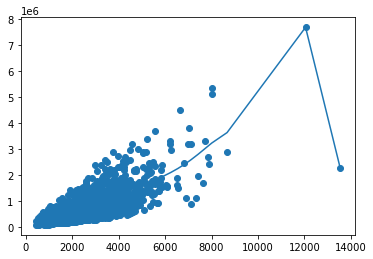

In [11]:

### Trying the first data set with a 15th degree polynomial
plot_lines(set1, 15, l2_small_penalty)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[ 8.59362651e+02 -8.18118278e-01  4.28879983e-04 -9.12770660e-08
  -2.69604404e-12  3.73980300e-15 -1.42711882e-19 -6.30794703e-23
  -1.44559628e-27  7.44321353e-31  9.25865883e-35  3.28010483e-41
  -1.29543508e-42 -1.38781255e-46  1.66546444e-50]]
intercept [-55614.64099733]


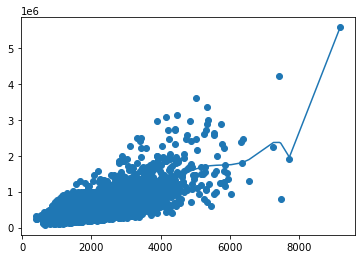

In [12]:

### Trying the second data set with a 15th degree polynomial
plot_lines(set2, 15, l2_small_penalty)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[-7.55395963e+02  9.75579541e-01 -4.58946006e-04  7.77958113e-08
   7.15013417e-12 -2.88602002e-15 -2.13677720e-20  3.38085194e-23
   2.19178226e-27 -1.97067793e-31 -4.15993202e-35 -1.80196143e-39
   3.19071198e-43  5.08456859e-47 -3.93304243e-51]]
intercept [470987.87434957]


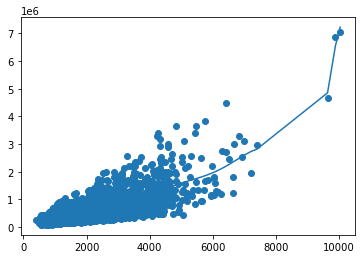

In [13]:

### Trying the third data set with a 15th degree polynomial
plot_lines(set3, 15, l2_small_penalty)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[ 1.11944571e+03 -9.83760212e-01  3.38770897e-04  3.60377209e-08
  -4.37814017e-11  5.77191690e-15  7.66795221e-19 -9.49297664e-23
  -1.96030821e-26 -2.10880282e-32  3.31005065e-34  3.47733891e-38
  -2.43039323e-42 -8.79553219e-46  6.44569659e-50]]
intercept [-145655.61849999]


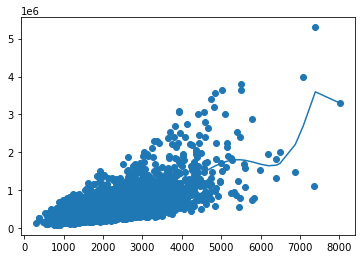

In [14]:

### Trying the fourth data set with a 15th degree polynomial
plot_lines(set4, 15, l2_small_penalty)




<h3 id="2.1-Ridge-regression-with-large-penalty">2.1 Ridge regression with large penalty<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#2.1-Ridge-regression-with-large-penalty">Â¶</a></h3><p>Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.) Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty.</p>


In [15]:

l2_large_penalty=1.23e2


D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
  1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
  1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
  4.09542560e-50 2.85464889e-54 1.99547476e-58]]
intercept [539103.0310578]


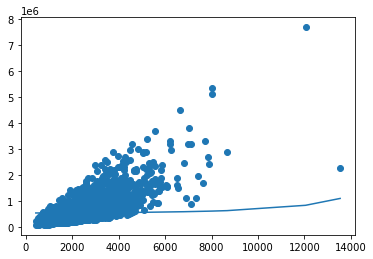

In [16]:

### Trying the first data set with a 15th degree polynomial
plot_lines(set1, 15, l2_large_penalty)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
  9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
  9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
  1.15453748e-47 1.23211305e-51 1.31986696e-55]]
intercept [529853.0253578]


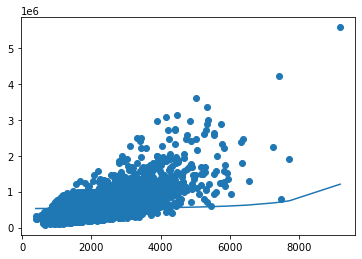

In [17]:

### Trying the second data set with a 15th degree polynomial
plot_lines(set2, 15, l2_large_penalty)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
  6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
  4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
  4.84635021e-48 4.85883628e-52 4.87558469e-56]]
intercept [533640.11409744]


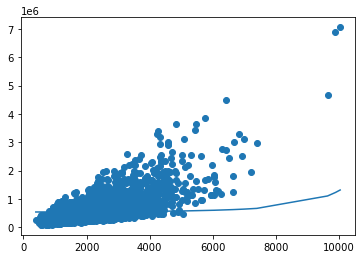

In [18]:

### Trying the third data set with a 15th degree polynomial
plot_lines(set3, 15, l2_large_penalty)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
coef [[2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
  1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
  2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
  5.67212304e-47 6.85958087e-51 8.30843630e-55]]
intercept [524562.96904668]


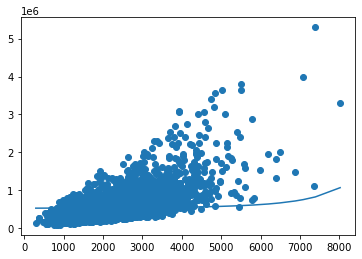

In [19]:

### Trying the fourth data set with a 15th degree polynomial
plot_lines(set4, 15, l2_large_penalty)




<h3 id="3.-Selecting-an-L2-Penalty-via-Cross-validation">3. Selecting an L2 Penalty via Cross-validation<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#3.-Selecting-an-L2-Penalty-via-Cross-validation">Â¶</a></h3><p>Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.</p>
<p>We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:</p>
<p>Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set</p>
<p>After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.</p>
<p>To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. GraphLab Create has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use seed=1 to get consistent answer.)</p>


In [20]:

train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype = dtype_dict)
test_wk4 = pd.read_csv('wk3_kc_house_test_data.csv', dtype = dtype_dict)



<p>Once the data is shuffled, we divide it into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n<em>2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n</em>i/k) and ends at (n*(i+1)/k)-1.</p>
<p>With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.</p>


In [21]:

n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    print (i, (start, end))



0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)



<p>Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe, (iv) name of output column (e.g. price) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.</p>
<p>For each i in [0, 1, ..., k-1]:
Compute starting and ending indices of segment i and call 'start' and 'end'
Form validation set by taking a slice (start:end+1) from the data.
Form training set by appending slice (end+1:n) to the end of slice (0:start).
Train a linear model using training set just formed, with a given l2_penalty
Compute validation error using validation set just formed</p>


In [22]:

from sklearn.metrics import mean_squared_error
def sample(dataset, deg):
    y = dataset['price']
    arr_x = []
    for i in range(deg):
        name_var = 'power_'+str(i+1)
        arr_x.append(name_var)
    x = dataset[arr_x]
    return (x,y)

def k_fold_cross_validation(k, l2_penalty, data, deg):
    n = len(train_valid_shuffled)
    k = 10 # 10-fold cross-validation
    ridge = linear_model.Ridge(alpha = l2_penalty, normalize = True)
    rss =[]
    
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        data_val = data[start:end]
        data_train = data[0:start].append(data[end+1:n])
        x_train,y_train = sample(data_train, deg)
        x_val, y_val = sample(data_val, deg)
        ridge1 = ridge.fit(x,y)
        y_val_pred = ridge1.predict(x_val)
        RSS = len(y_val)*mean_squared_error(y_val, ridge1.predict(x_val))
        rss.append(RSS)
    print('Minimum RSS:', min(rss), 'with alpha is', '%e' % l2_penalty)
    return min(rss)




<p>Once we have a function to compute the average validation error for a model, we can write another function to find the model that minimizes the average validation error. Write the function that does the following:</p>
<ul>
<li>We will again be aiming to fit a 15th-order polynomial model using the sqft_living input</li>
<li>Loop for different l2_penalty</li>
<li>Run 10-fold cross-validation with l2_penalty</li>
<li>Report which L2 penalty produced the lowest average validation error.</li>
</ul>


In [23]:

def penalty(pen, k, data, deg):
    rss = []
    for i in range(len(pen)):
        l2_penalty = pen[i]
        rss1 = k_fold_cross_validation(k, l2_penalty, data, deg)
        rss.append(rss1)
    print(min(rss))
    return min(rss)



In [24]:

data_crossk = polynominal_dataframe('sqft_living', 15, train_valid_shuffled)



D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


In [25]:

pen = np.logspace(3, 9, num=13)
print(pen)



[1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05 3.16227766e+05 1.00000000e+06 3.16227766e+06
 1.00000000e+07 3.16227766e+07 1.00000000e+08 3.16227766e+08
 1.00000000e+09]


In [26]:
penalty(pen, 10, data_crossk, 15)

Minimum RSS: 213851458314870.97 with alpha is 1.000000e+03
Minimum RSS: 214398008668599.88 with alpha is 3.162278e+03
Minimum RSS: 214571873892737.7 with alpha is 1.000000e+04
Minimum RSS: 214626958876978.66 with alpha is 3.162278e+04
Minimum RSS: 214644388704228.53 with alpha is 1.000000e+05
Minimum RSS: 214649901543039.2 with alpha is 3.162278e+05
Minimum RSS: 214651644960117.0 with alpha is 1.000000e+06
Minimum RSS: 214652196287443.28 with alpha is 3.162278e+06
Minimum RSS: 214652370633495.9 with alpha is 1.000000e+07
Minimum RSS: 214652425766663.06 with alpha is 3.162278e+07
Minimum RSS: 214652443201311.75 with alpha is 1.000000e+08
Minimum RSS: 214652448714632.8 with alpha is 3.162278e+08
Minimum RSS: 214652450458098.12 with alpha is 1.000000e+09
213851458314870.97


213851458314870.97


<h3 id="4.-Ridge-Regression-with-Gradient-Descent">4. Ridge Regression with Gradient Descent<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#4.-Ridge-Regression-with-Gradient-Descent">Â¶</a></h3>



<p>In this assignment, we will implement ridge regression via gradient descent. We will convert an data frame into a Numpy array, write a Numpy function to compute the derivative of the regression weights with respect to a single feature, and write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty.</p>


In [44]:

### Importing data:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

data2 = pd.read_csv('kc_house_test_data.csv', dtype= dtype_dict)
data_test = pd.DataFrame(data2)
data = pd.read_csv('kc_house_data.csv', dtype= dtype_dict)
data = pd.DataFrame(data) 


In [68]:
data1 = pd.read_csv('kc_house_train_data.csv', dtype= dtype_dict)
data_train = pd.DataFrame(data1)


<p>Now we will write a function that will accept a DataFrame, a list of feature names (e.g. ['sqft_living', 'bedrooms']) and an target feature e.g. ('price') and will return two things:</p>
<ul>
<li>A numpy matrix whose columns are the desired features plus a constant column (this is how we create an 'intercept')</li>
<li>A numpy array containing the values of the output</li>
</ul>


In [69]:

def get_numpy_data(data_sframe, features, output):
    features_matrix = data_sframe[features] 
    features_matrix['constant'] = 1
    features.insert(0, 'constant')
    features_matrix = features_matrix[features]
    features_matrix = np.array(features_matrix)
    output_array = data_sframe[output]
    output_array = np.array(output_array)
    return(features_matrix, output_array)



<p>A function â€˜predict_outputâ€™ which accepts a 2D array â€˜feature_matrixâ€™ and a 1D array â€˜weightsâ€™ and returns a 1D array â€˜predictionsâ€™.</p>


In [70]:

def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)



<h5 id="Computing-the-Derivative">Computing the Derivative<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#Computing-the-Derivative">Â¶</a></h5><p>We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.</p>
<p>Cost(w)
= SUM[ (prediction - output)^2 ]</p>
<ul>
<li>l2_penalty*(w[0]^2 + w[1]^2 + ... + w[k]^2).
Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) as we did in the notebook for the unregularized case in Week 2 and add the derivative of the regularization part. As we saw, the derivative of the RSS with respect to w[i] can be written as:</li>
</ul>
<p>2<em>SUM[ error</em>[feature_i] ].
The derivative of the regularization term with respect to w[i] is:</p>
<p>2<em>l2_penalty</em>w[i].
Summing both, we get</p>
<p>2<em>SUM[ error</em>[feature_i] ] + 2<em>l2_penalty</em>w[i].
That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus 2<em>l2_penalty</em>w[i].</p>
<p>We will not regularize the constant. Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the 2<em>l2_penalty</em>w[0] term).</p>
<p>Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus 2<em>l2_penalty</em>w[i].</p>
<p>With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points). To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call feature_is_constant which you should set to True when computing the derivative of the constant and False otherwise.</p>


In [71]:

def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    rss_w = 2*(np.dot(feature,errors.transpose()))
    if feature_is_constant == True:
        derivative = 2*(np.dot(feature,errors.transpose()))
    if feature_is_constant == False:
        derivative = 2*(np.dot(feature,errors.transpose())) + 2*l2_penalty*weight
    return derivative

def gradient(errors,weights,feature,l2_penalty,rigid):
    rss_w = 2*(np.dot(feature.transpose(),errors))
    if rigid == True:
        derivative = rss_w
    if rigid == False:
        derivative = 2*(np.dot(feature,errors.transpose())) + 2*l2_penalty*weight
    return derivative
    

In [72]:
poly1_data = polynominal_dataframe('sqft_living',4,sales)
poly1_data
(example_features, example_output) = get_numpy_data(poly1_data, ["power_1","power_2","power_3","power_4"], 'price')
my_weights = np.array([1,6,4,4,5])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors
# next two lines should print the same values
#print(my_weights,errors)
print(gradient(errors,my_weights,example_features,1,True))
new_w=my_weights-gradient(errors,my_weights,example_features,1,True)
new_w
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))

[1.20962464e+19 5.55633264e+22 3.34630771e+26 2.62634755e+30
 2.52937966e+34]
1.209624642932167e+19


D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-85aab497b2fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)
<ipython-input-69-03fa7f68e06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a


<p>To test your feature derivartive run the following:</p>


In [73]:

(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1, 6])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print(my_weights)
print (feature_derivative_ridge(errors, example_features[:,1], my_weights, 1, False))
print (np.sum(errors*example_features[:,1])*2+20.)

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2.)



[1 6]
[-5.74479902e+13 -5.74479902e+13]
-57447990164902.0
-22806372314.0
-22806372314.0


<ipython-input-69-03fa7f68e06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_matrix['constant'] = 1



<h5 id="Gradient-Descent">Gradient Descent<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#Gradient-Descent">Â¶</a></h5><p>Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.</p>
<p>The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. Unlike in Week 2, this time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)</p>
<p>With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.</p>


In [74]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    
    weights = np.array(initial_weights)
    while not converged:
        # compute the predictions based on feature_matrix and weights:
        predictions = predict_outcome(feature_matrix, weights)
    
        # compute the errors as predictions - output:
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient
        # while not converged, update each weight individually:
        for i in range(len(weights)):
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # add the squared derivative to the gradient magnitude
            gradient_sum_squares += np.power(derivative, 2)
            # update the weight based on step size and derivative:
            weights[i] -= step_size * derivative
            
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)


def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations):
    weights = np.array(initial_weights) # make sure it's a numpy array
    j = 0
    w = initial_weights
    while j< max_iterations:
        j+=1
        test_predictions = predict_output(feature_matrix, w)
        errors = test_predictions - output
        for i in range(len(w)):
            if i == 0:
                der_cons = feature_derivative_ridge(errors, feature_matrix[:,i], w[i], l2_penalty, True)
                w[i] = w[i] - step_size*der_cons
            else:
                der = feature_derivative_ridge(errors, feature_matrix[:,i], w[i], l2_penalty, False)
                w[i] = w[i] - step_size*der
    return w




<p>In this part, we will only use 'sqft_living' to predict 'price'. Use the get_numpy_data function to get a Numpy versions of your data with only this feature, for both the train_data and the test_data.</p>


In [75]:

simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(data_train, simple_features, my_output)

<ipython-input-69-03fa7f68e06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_matrix['constant'] = 1


In [76]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_test_feature_matrix, test_output) = get_numpy_data(data_test, simple_features, my_output)

<ipython-input-69-03fa7f68e06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_matrix['constant'] = 1



<p>let's consider no regularization. Set the l2_penalty to 0.0 and run your ridge regression algorithm to learn the weights of your model.</p>


In [77]:

step_size = 1e-12
l2_penalty = 0
max_iterations = 1000
initial_weights = np.array([0., 0.])
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print(simple_weights_0_penalty)


[-1.63113515e-01  2.63024369e+02]



<p>let's consider high regularization. Set the l2_penalty to 1e11 and run your ridge regression algorithm to learn the weights of your model.</p>


In [78]:

step_size = 1e-12
l2_penalty = 1e11
max_iterations = 1000
initial_weights = np.array([0., 0.])
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print(simple_weights_high_penalty)



[  9.76730382 124.57217567]



<p>This code will plot the two learned models. (The blue line is for the model with no regularization and the red line is for the one with high regularization.)</p>


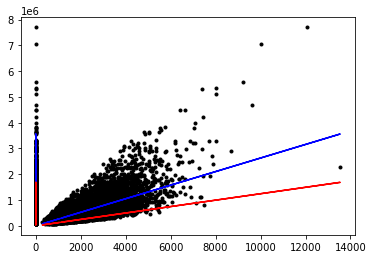

In [79]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')




<h5 id="Which-weights-perform-best?">Which weights perform best?<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#Which-weights-perform-best?">Â¶</a></h5><p>Compute the RSS on the TEST data for the following three sets of weights:</p>
<ul>
<li>The initial weights (all zeros)</li>
<li>The weights learned with no regularization</li>
<li>The weights learned with high regularization</li>
</ul>


In [80]:

### simple_test_feature_matrix, test_output
initial_weights = np.array([0., 0.])
rss_initial = (np.square(np.dot(simple_test_feature_matrix,initial_weights.transpose())-test_output)).sum()
print('rss_initial:', rss_initial)

rss_no_reg = (np.square(np.dot(simple_test_feature_matrix, simple_weights_0_penalty.transpose()) - test_output)).sum()
print('rss_no_reg:',rss_no_reg)

rss_reg = (np.square(np.dot(simple_test_feature_matrix, simple_weights_high_penalty.transpose()) - test_output)).sum()
print('rss_reg:', rss_reg)



rss_initial: 927913649762512.0
rss_no_reg: 143065780375905.88
rss_reg: 361042502841367.75



<h5 id="Running-a-multiple-regression-with-L2-penalty">Running a multiple regression with L2 penalty<a class="anchor-link" href="https://tung-dn.github.io/prog_ML_reg4.html#Running-a-multiple-regression-with-L2-penalty">Â¶</a></h5><p>Let us now consider a model with 2 features: ['sqft_living', 'sqft_living15'].</p>


In [81]:

model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(data_train, model_features, my_output)



<ipython-input-69-03fa7f68e06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_matrix['constant'] = 1


In [82]:

model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(test_feature_matrix, test_output) = get_numpy_data(data_test, model_features, my_output)



<ipython-input-69-03fa7f68e06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_matrix['constant'] = 1


In [83]:

step_size = 1e-12
l2_penalty = 0
max_iterations = 1000
initial_weights = np.array([0., 0., 0.])
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print(multiple_weights_0_penalty)



[ -0.35743483 243.05416982  22.41481497]


In [84]:

step_size = 1e-12
l2_penalty = 1e11
max_iterations = 1000
initial_weights = np.array([0., 0., 0.])
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print(multiple_weights_high_penalty)



[ 6.74296579 91.48927365 78.43658766]


In [85]:

initial_weights = np.array([0., 0., 0.])
rss_initial = (np.square(np.dot(test_feature_matrix,initial_weights.transpose())-test_output)).sum()
print('rss_initial:', rss_initial)

rss_no_reg = (np.square(np.dot(test_feature_matrix, multiple_weights_0_penalty.transpose()) - test_output)).sum()
print('rss_no_reg: ',rss_no_reg)

rss_reg = (np.square(np.dot(test_feature_matrix, multiple_weights_high_penalty.transpose()) - test_output)).sum()
print('rss_reg:    ', rss_reg)



rss_initial: 927913649762512.0
rss_no_reg:  142732905944873.2
rss_reg:     261239637977090.16


In [86]:
print(predict_output())

TypeError: predict_output() missing 2 required positional arguments: 'feature_matrix' and 'weights'

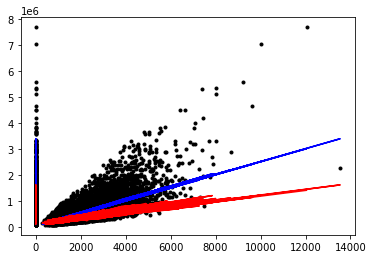

In [87]:
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(feature_matrix, multiple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(feature_matrix, multiple_weights_high_penalty),'r-')



In [88]:
print(predict_output(feature_matrix, multiple_weights_0_penalty))
print(predict_output(feature_matrix, multiple_weights_high_penalty))
print(output)

[316839.41501558 662529.8963067  248119.65004952 ... 406167.18929748
 420491.20338838 270778.00705338]
[213069.11333829 367692.00938996 283801.00211839 ... 259993.31077082
 256985.16940651 173331.12150247]
[221900. 538000. 180000. ... 360000. 400000. 325000.]
